In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD

from helper_functions import fit, evaluate_model, scale_data, draw_epochs_losses

In [4]:
print(os.listdir("../Data/Input"))

['Life Expectancy Data.csv', 'Test', 'Train']


# **1 &nbsp;&nbsp;&nbsp; Load Data**

In [5]:
train_df = pd.read_csv("../Data/Input/Train/train.csv")
test_df = pd.read_csv("../Data/Input/Test/test.csv")

# **2 &nbsp;&nbsp;&nbsp; Standardize Data**

In [32]:
# Drop columns Country and Year
new_train = train_df.drop(columns=["Country", "Year"])
new_test = test_df.drop(columns=["Country", "Year"])

In [33]:
# Get the features and target
all_features_train = new_train.drop(columns=["Life expectancy "])
all_features_test = new_test.drop(columns=["Life expectancy "])

all_target_train = new_train["Life expectancy "]
all_target_test = new_test["Life expectancy "]

In [34]:
# Convert to tensor
X_all_train = torch.tensor(all_features_train.values, dtype=torch.float32)
y_all_train = torch.tensor(all_target_train.values, dtype=torch.float32).view(-1, 1)

X_all_test = torch.tensor(all_features_test.values, dtype=torch.float32)
y_all_test = torch.tensor(all_target_test.values, dtype=torch.float32).view(-1, 1)

In [35]:
# Scale data
X_all_train = scale_data(X_all_train)
y_all_train = scale_data(y_all_train)

X_all_test = scale_data(X_all_test)
y_all_test = scale_data(y_all_test)

### **3 &nbsp;&nbsp;&nbsp; Declare Model**

In [36]:
all_model = Linear(in_features=X_all_train.shape[1], out_features=1)
for param in all_model.parameters():
    print(param)

Parameter containing:
tensor([[-0.0388,  0.1957,  0.0504,  0.0509, -0.1535, -0.1938,  0.0480, -0.2203,
         -0.0699, -0.0716,  0.1477,  0.1409,  0.0108, -0.0432, -0.1630, -0.2113,
         -0.2180,  0.1199,  0.0526]], requires_grad=True)
Parameter containing:
tensor([0.0738], requires_grad=True)


### **4 &nbsp;&nbsp;&nbsp; Train Model**

In [37]:
all_model, all_epochs_losses = fit(
    all_model, 
    criterion=MSELoss(), 
    optimizer=SGD(all_model.parameters(), lr=0.01),
    train_data=X_all_train, 
    train_target=y_all_train, 
    epochs=2000, 
    n_iter_not_change=500, 
    lr_decay=0.1
)

Epoch [1/2000], Loss: 1.0995, LR: 0.01000
Epoch [100/2000], Loss: 0.1829, LR: 0.01000
Epoch [200/2000], Loss: 0.1675, LR: 0.01000
Epoch [300/2000], Loss: 0.1649, LR: 0.01000
Epoch [400/2000], Loss: 0.1640, LR: 0.01000
Epoch [500/2000], Loss: 0.1636, LR: 0.01000
Epoch [600/2000], Loss: 0.1636, LR: 0.00100
Epoch [700/2000], Loss: 0.1635, LR: 0.00100
Epoch [800/2000], Loss: 0.1635, LR: 0.00100
Epoch [900/2000], Loss: 0.1635, LR: 0.00100
Epoch [1000/2000], Loss: 0.1635, LR: 0.00100
Epoch [1100/2000], Loss: 0.1634, LR: 0.00010
Epoch [1200/2000], Loss: 0.1634, LR: 0.00010
Epoch [1300/2000], Loss: 0.1634, LR: 0.00010
Epoch [1400/2000], Loss: 0.1634, LR: 0.00010
Epoch [1500/2000], Loss: 0.1634, LR: 0.00010
Epoch [1600/2000], Loss: 0.1634, LR: 0.00001
Epoch [1700/2000], Loss: 0.1634, LR: 0.00001
Epoch [1800/2000], Loss: 0.1634, LR: 0.00001
Epoch [1900/2000], Loss: 0.1634, LR: 0.00001
Epoch [2000/2000], Loss: 0.1634, LR: 0.00001


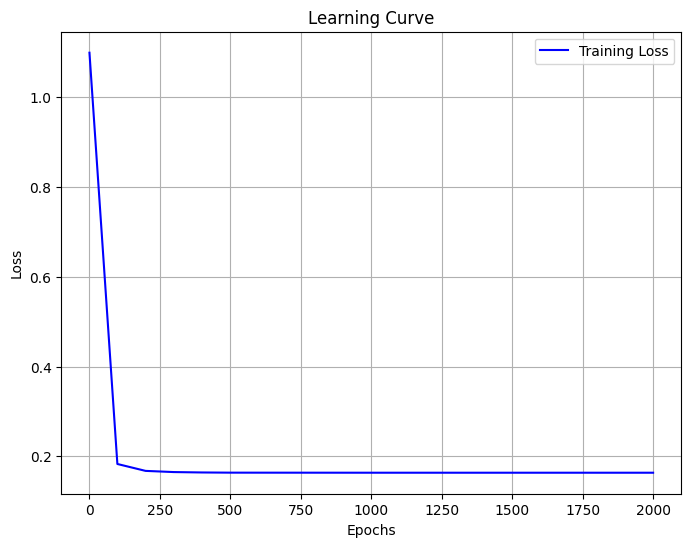

In [38]:
draw_epochs_losses(all_epochs_losses)

# **5 &nbsp;&nbsp;&nbsp; Evaluate Model**

In [39]:
all_loss = evaluate_model(
    all_model,
    criterion=MSELoss(),
    test_data=X_all_test,
    test_target=y_all_test
)

print("Model loss:", all_loss.item())

Model loss: 0.17774197459220886


In [40]:
print("Model weights:", all_model.weight)
print("Model bias:", all_model.bias)

Model weights: Parameter containing:
tensor([[-0.0811, -0.0998, -0.0115, -0.0234,  0.0281, -0.0500, -0.0146, -0.0006,
         -0.1036, -0.0156,  0.0341,  0.1110, -0.4048,  0.0125,  0.0429,  0.0167,
         -0.0532,  0.3036,  0.0216]], requires_grad=True)
Model bias: Parameter containing:
tensor([3.3591e-07], requires_grad=True)


# **6 &nbsp;&nbsp;&nbsp; Write to File**

In [8]:
torch.save(all_model.state_dict(), "../Data/Output/AllFeaturesModel/all_features_model.pth")